In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import dateutil.parser
import time
import pytz
import pickle

plt.rcParams['axes.unicode_minus'] = False

In [2]:
timeList = list()
counter = Counter()

with open('time_lst.bin', 'rb') as f:
    while True:
        try:
            timeList += pickle.load(f)
        except:
            break

with open('counter.bin', 'rb') as f:
    counter = pickle.load(f)

In [3]:
tag_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
tag_df.columns = ["index", "count"]
tag_df.sort_values("count", 0,False, True)

idx_num = tag_df[tag_df['count'] <= 20].index
tag_df = tag_df.drop(idx_num)
i = 0
index = []
for _ in tag_df['count']:
  index.append(i)
  i+=1
tag_df.index = index
tag_df

,index,count
0,먹스타그램,304
1,맛스타그램,123
2,일상,96
3,맞팔,84
4,좋아요,78


In [4]:
time_dict = {}
for i in range(0, 24):
  time_dict[i] = 0
for isotime in timeList:
  utctime = dateutil.parser.parse(isotime)
  localtime = utctime.astimezone(pytz.timezone("Asia/Seoul"))
  time_dict[localtime.hour] += 1
print(time_dict)

time_df = pd.DataFrame.from_dict(time_dict, orient='index').reset_index()
time_df.columns = ['time', 'count']
time_df

{0: 45, 1: 30, 2: 18, 3: 12, 4: 4, 5: 11, 6: 9, 7: 20, 8: 42, 9: 45, 10: 68, 11: 8, 12: 5, 13: 3, 14: 5, 15: 5, 16: 4, 17: 5, 18: 15, 19: 14, 20: 41, 21: 106, 22: 97, 23: 87}


,time,count
0,0,45
1,1,30
2,2,18
3,3,12
4,4,4
5,5,11
6,6,9
7,7,20
8,8,42
9,9,45


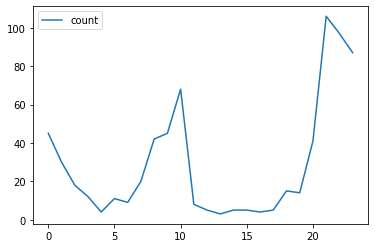

In [5]:
lines = time_df.plot.line(y="count")